In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mne import read_epochs, compute_rank, create_info, set_log_level, concatenate_epochs
from mne.decoding import CSP
from mne.preprocessing import ICA
from mne.time_frequency import tfr_multitaper
from mne.decoding import UnsupervisedSpatialFilter
from mne.time_frequency import AverageTFR

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, ShuffleSplit

from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [2]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

 CSP + LDA classification

In [3]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset

Number of events,76
Events,left: 30rest: 46
Time range,-2.000 – 7.999 sec
Baseline,off


In [4]:
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')
pca = PCA(n_components=.80)
# cv = LeaveOneOut()
le = LabelEncoder()

In [5]:
freqs = [2.,7.,18.,35.,60.,90.,110.,120.,140]
freq_tags= ['2-7Hz','7-18','18-35','35-60','60-90','90-110','110-120','120-140']
freq_ranges = list(zip(freqs[:-1], freqs[1:]))

In [6]:
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
full_chance = np.mean(y == y[0])
full_chance = max(full_chance, 1. - full_chance)

Classification with different time, csp and freqs

In [7]:
scores = []
time_config = [
    (1,0.2,1000,0),
    (3,0.2,300,0), 
    (3,0.2,400,100), 
    (3,0.4,300,100), 
    (3,0.4,400,200), 
    (3,0.4,500,200), 
]
components = [2,4,8,10,12]

running config 1 .
[0.55259259 0.59259259 0.52592593 0.56       0.54074074 0.52592593
 0.53481481 0.54074074]
[0.53216374 0.56140351 0.52631579 0.5380117  0.57309942 0.57309942
 0.59649123 0.58479532]
[0.56740741 0.66074074 0.57925926 0.57185185 0.56296296 0.53925926
 0.5437037  0.54814815]
[0.60233918 0.66081871 0.64327485 0.59064327 0.59649123 0.55555556
 0.53216374 0.5380117 ]
[0.59407407 0.66518519 0.55555556 0.52296296 0.52888889 0.50962963
 0.51407407 0.50962963]
[0.64912281 0.7251462  0.70175439 0.58479532 0.66081871 0.59064327
 0.62573099 0.60818713]
[0.58222222 0.66962963 0.62814815 0.59259259 0.58962963 0.5837037
 0.58518519 0.60148148]
[0.60818713 0.75438596 0.59649123 0.57309942 0.59649123 0.57894737
 0.53216374 0.5497076 ]
running config 2 ..
[0.57333333 0.73185185 0.64888889 0.55407407 0.55111111 0.50518519
 0.52148148 0.51111111]
[0.61988304 0.70760234 0.69005848 0.57309942 0.50877193 0.5497076
 0.5380117  0.5497076 ]
[0.61481481 0.72148148 0.64148148 0.56740741 0.567407

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

[0.57481481 0.72888889 0.5837037  0.55703704 0.5362963  0.51703704
 0.52       0.54962963]
[0.59649123 0.78362573 0.57309942 0.63157895 0.56140351 0.5380117
 0.56725146 0.56140351]


C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

running config 5 .....


C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

[0.60592593 0.74222222 0.59851852 0.57777778 0.56592593 0.56444444
 0.55851852 0.55259259]
[0.5497076  0.78947368 0.65497076 0.60233918 0.58479532 0.57894737
 0.59649123 0.59064327]


C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

[0.60444444 0.74814815 0.63555556 0.60296296 0.56296296 0.53925926
 0.54074074 0.55703704]
[0.57894737 0.78362573 0.7251462  0.60818713 0.59649123 0.58479532
 0.56725146 0.58479532]


C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

[0.58666667 0.75259259 0.64       0.60888889 0.57037037 0.56148148
 0.55703704 0.56148148]
[0.57309942 0.78362573 0.63157895 0.60818713 0.55555556 0.5497076
 0.5497076  0.54385965]


C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

running config 6 ......


C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

[0.56444444 0.7762963  0.68296296 0.6        0.58518519 0.56
 0.57037037 0.58518519]
[0.5497076  0.76608187 0.66666667 0.63157895 0.63157895 0.59649123
 0.63157895 0.61988304]


C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

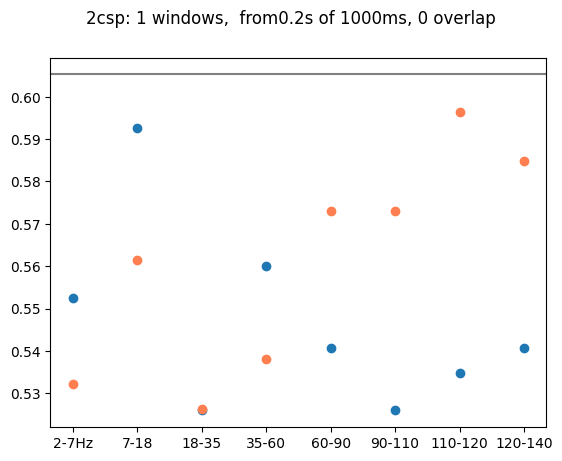

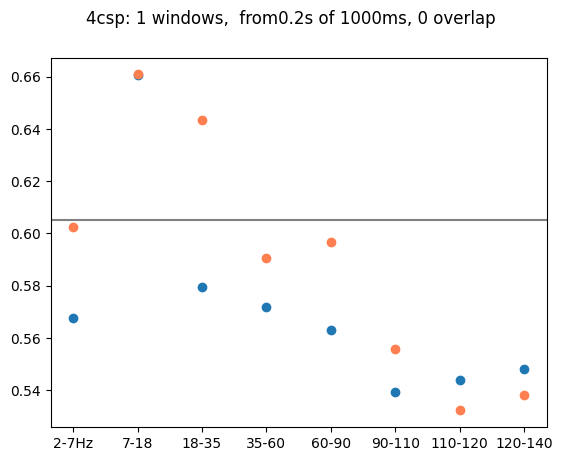

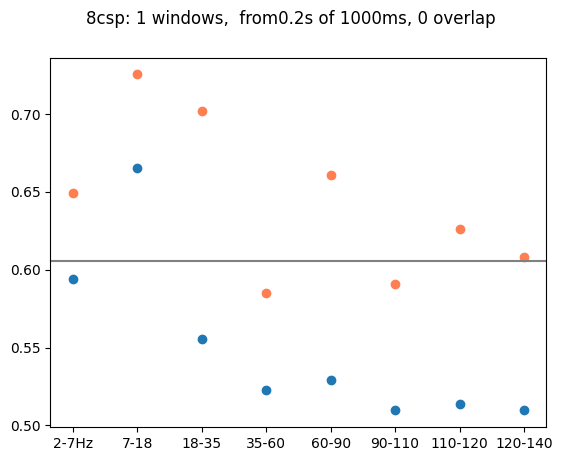

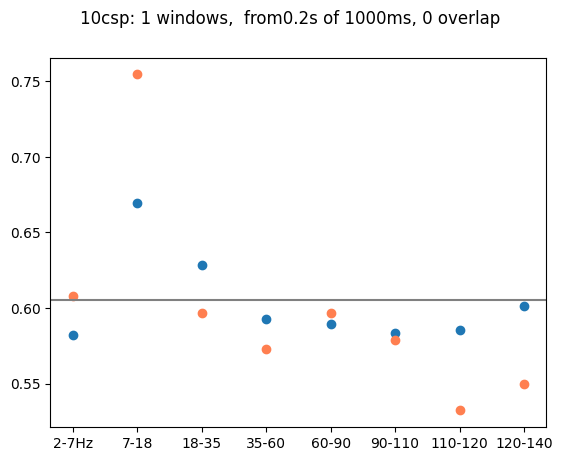

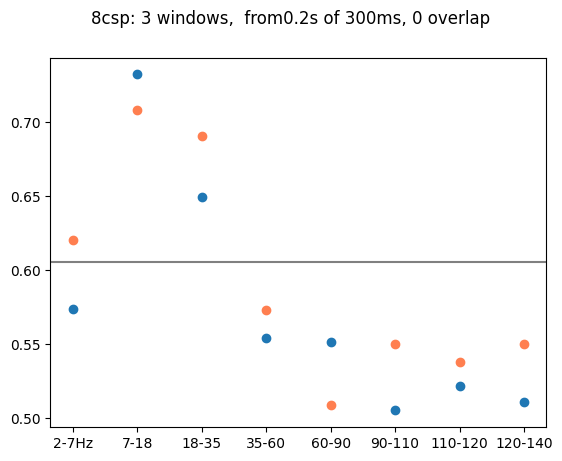

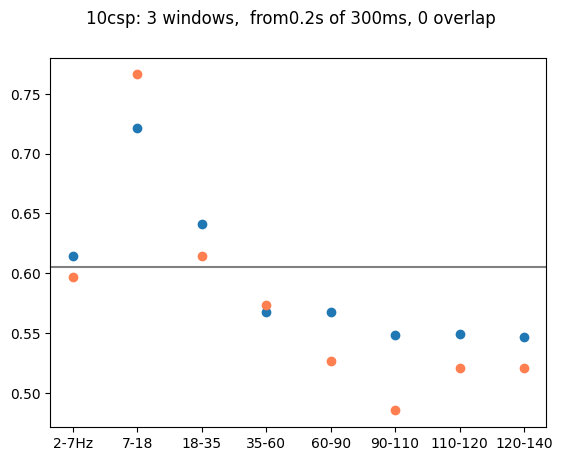

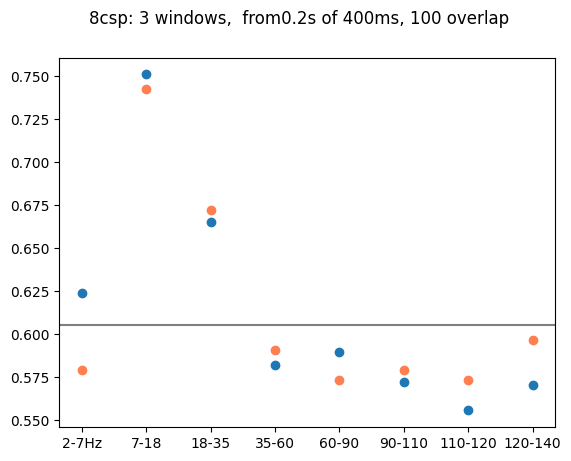

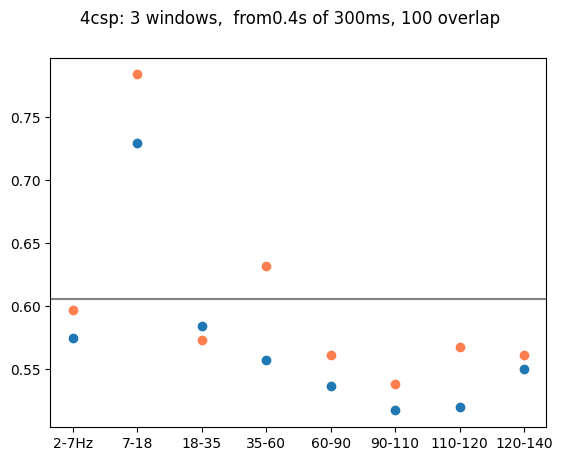

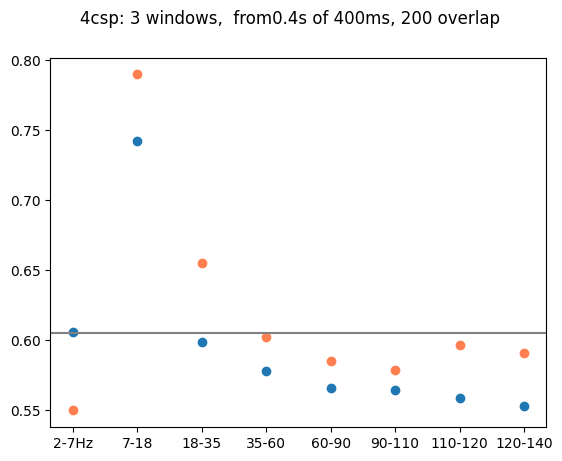

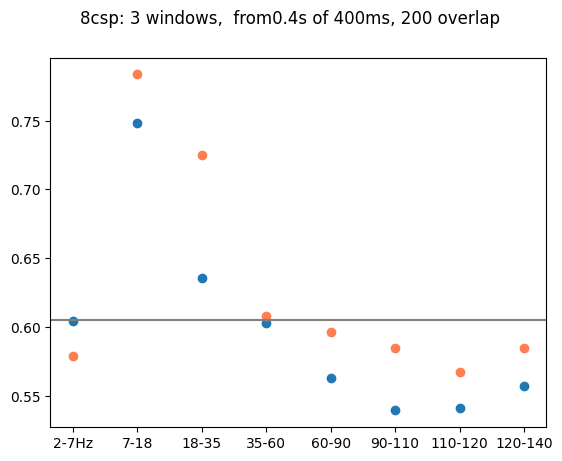

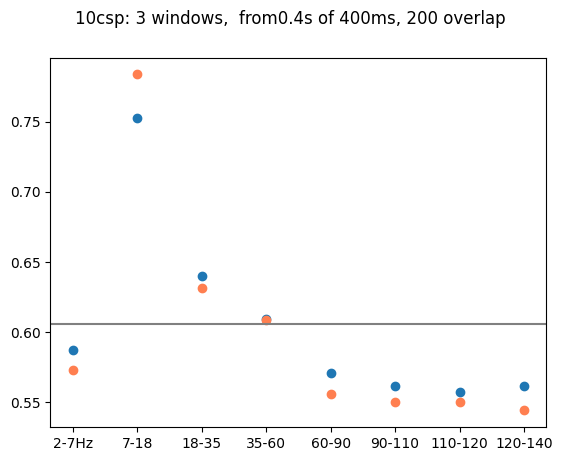

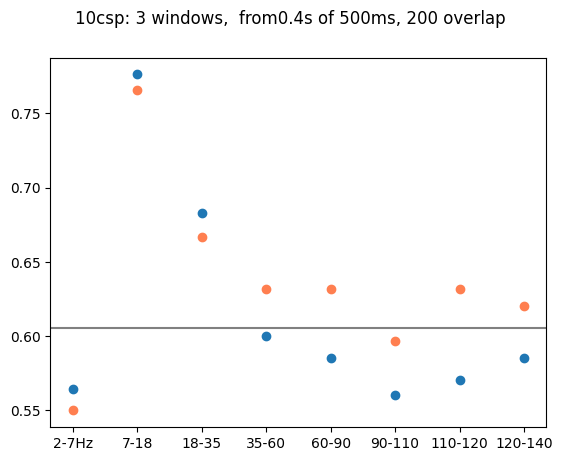

In [9]:
find_best_accuracy()

left vs rest 

In [10]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset

Number of events,63
Events,left: 30right: 33
Time range,-2.000 – 7.999 sec
Baseline,off


In [11]:
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
full_chance = np.mean(y == y[0])
full_chance = max(full_chance, 1. - full_chance)

running config 1 .
[0.46666667 0.45185185 0.48518519 0.55925926 0.51666667 0.50185185
 0.50185185 0.50185185]
[0.33333333 0.44444444 0.39583333 0.56944444 0.44444444 0.40277778
 0.41666667 0.38888889]
running config 2 ..
running config 3 ...
[0.44259259 0.43333333 0.4537037  0.54814815 0.48888889 0.5
 0.44259259 0.47592593]
[0.36111111 0.36805556 0.50694444 0.59027778 0.45833333 0.52777778
 0.45138889 0.45138889]
running config 4 ....


C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

[0.45740741 0.46851852 0.48518519 0.56111111 0.5        0.48333333
 0.46111111 0.49074074]
[0.36111111 0.41666667 0.375      0.60416667 0.54166667 0.45833333
 0.52777778 0.54861111]


C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

running config 5 .....


C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

[0.47222222 0.46481481 0.47222222 0.55       0.52962963 0.55925926
 0.50185185 0.53888889]
[0.38888889 0.38888889 0.44444444 0.625      0.49305556 0.50694444
 0.41666667 0.46527778]


C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

running config 6 ......


C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

[0.42037037 0.45185185 0.46111111 0.58518519 0.52592593 0.50925926
 0.47592593 0.46666667]
[0.35416667 0.49305556 0.46527778 0.61111111 0.50694444 0.46527778
 0.50694444 0.48611111]


C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:29: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\371

C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:95: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965853.py:96: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
C:\Users\at18157\AppData\Local\Temp\ipykernel_10008\3714965

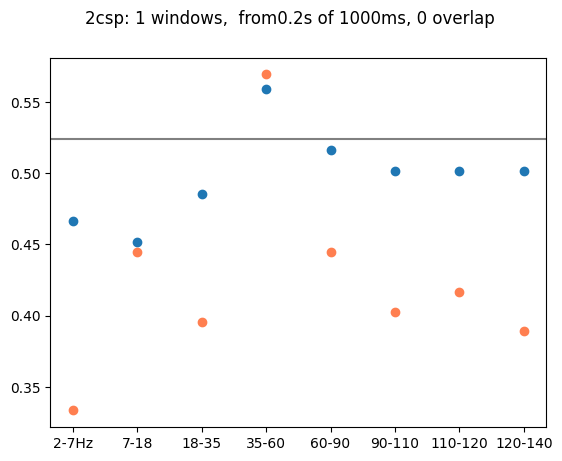

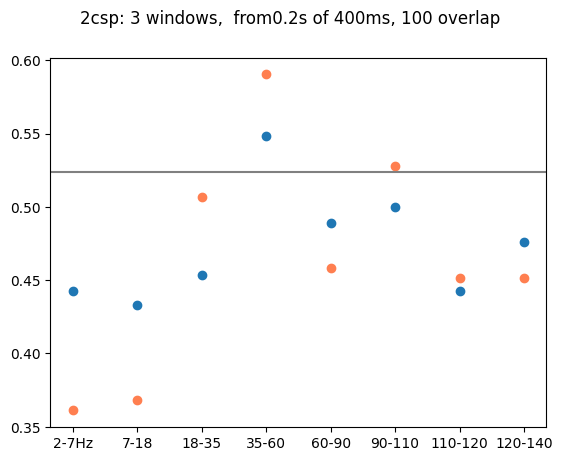

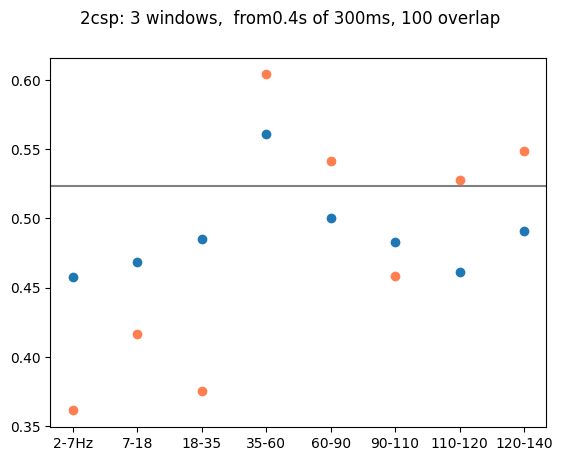

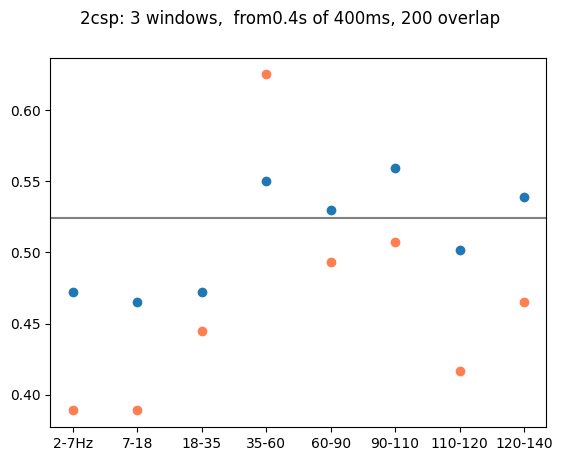

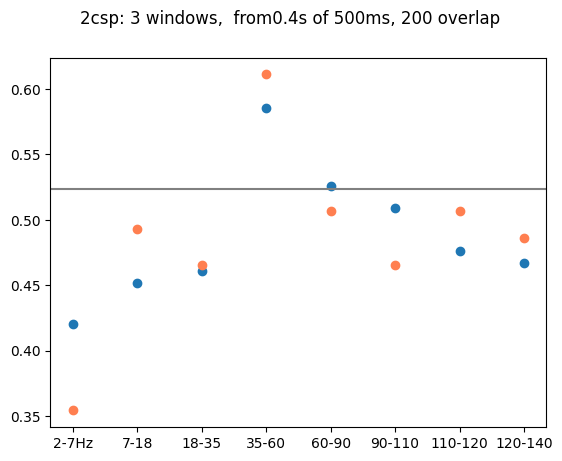

In [12]:
find_best_accuracy()

In [8]:
def find_best_accuracy():
    optimal_config = [0,0,0,0,0]
    max_accuracy = 0
    cnf_i = 0
    best_score = 0
    best_val_score = 0
    best_config = [0,0,0]
    for cnf in time_config:
        print('running config',cnf_i+1,'.'*(cnf_i+1))
        n_windows, t_min, width, overlap = cnf
        component_score = []
        cmp_i = 0
        for cmp in components:
            csp = CSP(n_components=cmp, reg=None, log=True, norm_trace=False, rank='info')

            test_rep_train_score = []
            test_rep_test_score = []
            for test_rep in range(9) :
                #split training set
                train_epochs, test_epochs, y_train, y_test = train_test_split(subset, y)
                train_epochs = concatenate_epochs(train_epochs)
                test_epochs = concatenate_epochs(test_epochs)
                chance = np.mean(y_train == y_train[0])
                chance = max(chance, 1. - chance)

                freq_scores_mean = []
                for freq, (fmin, fmax) in enumerate(freq_ranges):
                    X = []
                    train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()

                    cv_score = []
                    for val_rep in range(5):
                        cv = ShuffleSplit(n_splits=3, test_size=0.25, random_state=25 + val_rep)
                        cv_split = cv.split(train_data)
                        single_scr = []
                        for train_idx, test_idx in cv_split:
                                y_train_train, y_test_train = y_train[train_idx], y_train[test_idx]
                                X_train = []
                                X_test = []
                                csp.fit(train_data[train_idx], y_train_train)
                                w_min = 0
                                for i in range(n_windows):
                                    w_max = w_min + width
                                    X_train.append(csp.transform(train_data[train_idx,:,w_min:w_max]))
                                    X_test.append(csp.transform(train_data[test_idx,:,w_min:w_max]))
                                    w_min += w_max - overlap

                                X_train = np.concatenate(np.array(X_train), axis=1)
                                X_test = np.concatenate(np.array(X_test), axis=1)
                                if X_train.shape[1] > 7:
                                    X_train = pca.fit_transform(X_train)
                                    X_test = pca.transform(X_test)

                                lda.fit(X_train, y_train_train)
                                single_scr.append(lda.score(X_test, y_test_train))
                        cv_score.append(np.median(single_scr))

                    freq_scores_mean.append(np.mean(cv_score))

                val_scores = validate_config(
                    train_epochs, test_epochs, y_train, y_test, cnf, cmp, freq_scores_mean)
                
                test_rep_test_score.append(val_scores)    
                test_rep_train_score.append(freq_scores_mean)
                
            optimal_config = [cnf_i,cmp,freq]
            
            test_rep_train_score = np.mean(test_rep_train_score, axis=0)
            test_rep_test_score = np.mean(test_rep_test_score, axis=0)
            
            max_train_test_score = np.max(np.mean([test_rep_train_score, test_rep_test_score], axis=0))
            
            if max_train_test_score > best_score : 
                print(test_rep_train_score)
                print(test_rep_test_score)
                csp_fig, axes = plt.subplots(1)
                axes.scatter(freq_tags, test_rep_train_score)
                axes.scatter(freq_tags, test_rep_test_score, color='coral')
                csp_fig.suptitle('{}csp: {} windows,  from{}s of {}ms, {} overlap'.format(optimal_config[1],n_windows,t_min,width,overlap))
                axes.axhline(full_chance, c='grey')
               
                best_score = max_train_test_score
        
            cmp_i += 1    
        cnf_i += 1
        
def validate_config(train_epochs, test_epochs, y_train, y_test, config, csp, train_scores):
    n_windows, t_min, width, overlap = config
    csp = CSP(n_components=csp, reg=None, log=True, norm_trace=False, rank='info')
    freq_score = []
    validated = False
    for freq, (fmin, fmax) in enumerate(freq_ranges):
        X_train = []
        X_test = []
        train_data = train_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
        test_data = test_epochs.copy().crop(t_min,1.9).filter(fmin, fmax, n_jobs=4,verbose=None).get_data()
        
        csp.fit(train_data, y_train)
        w_min = 0
        for i in range(n_windows):
            w_max = w_min + width
            X_train.append(csp.transform(train_data[:,:,w_min:w_max]))
            X_test.append(csp.transform(test_data[:,:,w_min:w_max]))
            w_min += w_max - overlap

        X_train = np.concatenate(np.array(X_train), axis=1)
        X_test = np.concatenate(np.array(X_test), axis=1)
        
        if X_train.shape[1] > 7:
            X_train = pca.fit_transform(X_train)
            X_test = pca.transform(X_test)
            
        lda.fit(X_train, y_train)
        freq_score.append(lda.score(X_test, y_test))
    
    return freq_score
    